In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dfx = pd.read_csv('covid_19_complete.csv')
dfx

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [3]:
df = dfx[dfx['Country/Region'] == 'India']

In [4]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 129 to 48936
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  0 non-null      object 
 1   Country/Region  188 non-null    object 
 2   Lat             188 non-null    float64
 3   Long            188 non-null    float64
 4   Date            188 non-null    object 
 5   Confirmed       188 non-null    int64  
 6   Deaths          188 non-null    int64  
 7   Recovered       188 non-null    int64  
 8   Active          188 non-null    int64  
 9   WHO Region      188 non-null    object 
 10  year            188 non-null    int64  
 11  month           188 non-null    int64  
 12  day             188 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 20.6+ KB


In [6]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,year,month,day
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia,2020,1,22
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia,2020,1,23
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia,2020,1,24
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia,2020,1,25
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia,2020,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47892,NaN,India,20.593684,78.96288,2020-07-23,1288108,30601,817209,440298,South-East Asia,2020,7,23
48153,NaN,India,20.593684,78.96288,2020-07-24,1337024,31358,849432,456234,South-East Asia,2020,7,24
48414,NaN,India,20.593684,78.96288,2020-07-25,1385635,32060,885573,468002,South-East Asia,2020,7,25
48675,NaN,India,20.593684,78.96288,2020-07-26,1435616,32771,917568,485277,South-East Asia,2020,7,26


In [7]:
df.drop(['Province/State'], axis = 1, inplace=True)

In [8]:
df.isnull().sum()

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
year              0
month             0
day               0
dtype: int64

In [9]:
dfn = df.groupby(['month', 'day'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

In [10]:
dfn.head(20)

Confirmed  Deaths  Recovered  Active
month day                                      
1     22           0       0          0       0
      23           0       0          0       0
      24           0       0          0       0
      25           0       0          0       0
      26           0       0          0       0
      27           0       0          0       0
      28           0       0          0       0
      29           0       0          0       0
      30           1       0          0       1
      31           1       0          0       1
2     1            1       0          0       1
      2            2       0          0       2
      3            3       0          0       3
      4            3       0          0       3
      5            3       0          0       3
      6            3       0          0       3
      7            3       0          0       3
      8            3       0          0       3
      9            3       0          0       3
      10           3       0          0       3

In [11]:
d = df[['Active']]

In [12]:
X = np.arange(len(d))
X.shape

(188,)

In [13]:
X

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

main = dfn.reset_index()
confirmed_df = main[['Date', 'Confirmed']]
deaths_df = main[['Date', 'Deaths']]
recovered_df = main[['Date', 'Recovered']]
active_df = main[['Date', 'Active']]

X = confirmed_df[['Date']]

In [14]:
Y = d.values
Y.shape

(188, 1)

In [15]:
Y

array([[     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     1],
       [     1],
       [     1],
       [     2],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     2],
       [     2],
       [    25],
       [    27],
       [    28],
       [    31],
       [    36],
       [    40],
       [    52],
       [    57],
       [    68],
       [    76],
       [    96],
       [    98],
       [   104],
       [   125],
       [   139],
       [   175],
       [   219

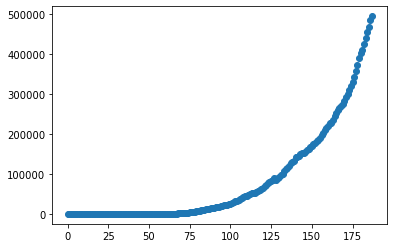

In [16]:
plt.scatter(X, Y)
plt.show()

In [17]:
X = X.reshape(-1, 1)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_axis = poly.fit_transform(X)
X_axis

array([[1.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 1.0000e+00, 1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00],
       [1.0000e+00, 3.0000e+00, 9.0000e+00],
       [1.0000e+00, 4.0000e+00, 1.6000e+01],
       [1.0000e+00, 5.0000e+00, 2.5000e+01],
       [1.0000e+00, 6.0000e+00, 3.6000e+01],
       [1.0000e+00, 7.0000e+00, 4.9000e+01],
       [1.0000e+00, 8.0000e+00, 6.4000e+01],
       [1.0000e+00, 9.0000e+00, 8.1000e+01],
       [1.0000e+00, 1.0000e+01, 1.0000e+02],
       [1.0000e+00, 1.1000e+01, 1.2100e+02],
       [1.0000e+00, 1.2000e+01, 1.4400e+02],
       [1.0000e+00, 1.3000e+01, 1.6900e+02],
       [1.0000e+00, 1.4000e+01, 1.9600e+02],
       [1.0000e+00, 1.5000e+01, 2.2500e+02],
       [1.0000e+00, 1.6000e+01, 2.5600e+02],
       [1.0000e+00, 1.7000e+01, 2.8900e+02],
       [1.0000e+00, 1.8000e+01, 3.2400e+02],
       [1.0000e+00, 1.9000e+01, 3.6100e+02],
       [1.0000e+00, 2.0000e+01, 4.0000e+02],
       [1.0000e+00, 2.1000e+01, 4.4100e+02],
       [1.

In [19]:
#power for day 1 and day 2
pd.DataFrame(X_axis)

,0,1,2
0,1.0,0.0,0.0
1,1.0,1.0,1.0
2,1.0,2.0,4.0
3,1.0,3.0,9.0
4,1.0,4.0,16.0
...,...,...,...
183,1.0,183.0,33489.0
184,1.0,184.0,33856.0
185,1.0,185.0,34225.0
186,1.0,186.0,34596.0


In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_axis,Y)

LinearRegression()

In [21]:
reg.coef_

array([[    0.        , -2519.33539037,    23.6084433 ]])

In [22]:
reg.intercept_

array([44676.26838818])

In [38]:
Yp = reg.predict(X_axis) 
Yp

array([[ 4.46762684e+04],
       [ 4.21805414e+04],
       [ 3.97320314e+04],
       [ 3.73307382e+04],
       [ 3.49766619e+04],
       [ 3.26698025e+04],
       [ 3.04101600e+04],
       [ 2.81977344e+04],
       [ 2.60325256e+04],
       [ 2.39145338e+04],
       [ 2.18437588e+04],
       [ 1.98202007e+04],
       [ 1.78438595e+04],
       [ 1.59147352e+04],
       [ 1.40328278e+04],
       [ 1.21981373e+04],
       [ 1.04106636e+04],
       [ 8.67040686e+03],
       [ 6.97736699e+03],
       [ 5.33154400e+03],
       [ 3.73293790e+03],
       [ 2.18154868e+03],
       [ 6.77376356e+02],
       [-7.79579086e+02],
       [-2.18931764e+03],
       [-3.55183931e+03],
       [-4.86714409e+03],
       [-6.13523199e+03],
       [-7.35610300e+03],
       [-8.52975712e+03],
       [-9.65619436e+03],
       [-1.07354147e+04],
       [-1.17674182e+04],
       [-1.27522047e+04],
       [-1.36897744e+04],
       [-1.45801272e+04],
       [-1.54232632e+04],
       [-1.62191822e+04],
       [-1.6

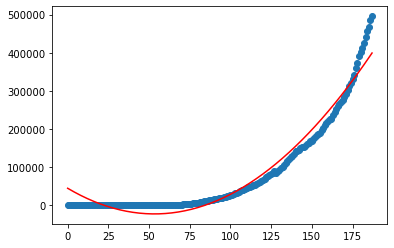

In [39]:
plt.scatter(X, Y)
plt.plot(X,Yp,color='r')
plt.show()


In [42]:
reg.score(X_axis,Y)*100

96.26653311029355

In [45]:
rmse = (np.sqrt(mean_squared_error(Y, Yp)))
print(rmse)

23672.078288026452
